# Univariate Linear Regression (California Housing Dataset)

More info on dataset: https://github.com/ageron/handson-ml/tree/master/datasets/housing

## Load libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing


## Load dataset

In [2]:
dataset = fetch_california_housing()

df = pd.DataFrame(data= np.c_[dataset.data, 100000*dataset.target],
                     columns = dataset.feature_names + ['target'])

df.head()

/Users/cgkr/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0


## Multivariate DNN Regression

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    df[df['target']<500000].drop(['target'], axis=1).values,
    df[df['target']<500000]['target'],
    test_size=0.2)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [4]:
from keras.models import Sequential
from keras.layers.core import Dense

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
# Compile model
model.compile(optimizer='rmsprop', loss='mse',  metrics=['mape'])
# Fit the model
model.fit(X_train, y_train, epochs=100, verbose=2, validation_split=0.2)

y_pred = model.predict(X_test)

Using TensorFlow backend.


Train on 12574 samples, validate on 3144 samples
Epoch 1/100
 - 0s - loss: 46427265202.1861 - mean_absolute_percentage_error: 99.9780 - val_loss: 46444039306.0967 - val_mean_absolute_percentage_error: 99.9302
Epoch 2/100
 - 0s - loss: 46295889704.6782 - mean_absolute_percentage_error: 99.7982 - val_loss: 46206308560.4478 - val_mean_absolute_percentage_error: 99.6079
Epoch 3/100
 - 0s - loss: 45905931111.3854 - mean_absolute_percentage_error: 99.2722 - val_loss: 45641667425.0585 - val_mean_absolute_percentage_error: 98.8473
Epoch 4/100
 - 0s - loss: 45129466750.5138 - mean_absolute_percentage_error: 98.2178 - val_loss: 44623101983.2672 - val_mean_absolute_percentage_error: 97.4689
Epoch 5/100
 - 0s - loss: 43833120277.7439 - mean_absolute_percentage_error: 96.4564 - val_loss: 43030790248.2239 - val_mean_absolute_percentage_error: 95.2851
Epoch 6/100
 - 0s - loss: 41911136502.2682 - mean_absolute_percentage_error: 93.7918 - val_loss: 40779034655.2672 - val_mean_absolute_percentage_error:

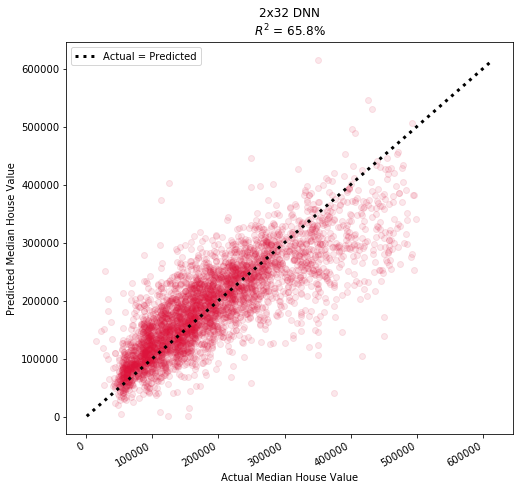

In [5]:
from sklearn.metrics import r2_score

fig = plt.figure(figsize=(8,8))

minv = min(y_test.min(), y_pred.min())
maxv = max(y_test.max(), y_pred.max())

plt.scatter(y_test, y_pred, alpha=0.1, c='crimson')
plt.plot([minv, maxv], [minv, maxv], c='k', linestyle=':', linewidth=3, label='Actual = Predicted')

plt.title('2x32 DNN\n$R^2$ = {:.1f}%'.format(100*r2_score(y_test, y_pred)))
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.legend()

fig.autofmt_xdate()
plt.show()

In [6]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=20,
                   verbose=0,
                   mode='auto',
                   restore_best_weights=True)

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))


model.add(Dense(1))
# Compile model
model.compile(optimizer='Nadam', loss='mse',  metrics=['mape'])
# Fit the model
model.fit(X_train, y_train, epochs=2000, verbose=2, validation_split=0.2, batch_size=256, callbacks=[es])

y_pred = model.predict(X_test)

Train on 12574 samples, validate on 3144 samples
Epoch 1/2000
 - 0s - loss: 46412924762.8440 - mean_absolute_percentage_error: 99.9522 - val_loss: 46270661254.1883 - val_mean_absolute_percentage_error: 99.6531
Epoch 2/2000
 - 0s - loss: 43595173892.8863 - mean_absolute_percentage_error: 95.5288 - val_loss: 36513540476.4173 - val_mean_absolute_percentage_error: 84.2346
Epoch 3/2000
 - 0s - loss: 21307503988.2526 - mean_absolute_percentage_error: 56.7695 - val_loss: 7910458880.0000 - val_mean_absolute_percentage_error: 36.6089
Epoch 4/2000
 - 0s - loss: 6728813461.2349 - mean_absolute_percentage_error: 37.5662 - val_loss: 6112108086.7176 - val_mean_absolute_percentage_error: 36.8399
Epoch 5/2000
 - 0s - loss: 5930598876.3302 - mean_absolute_percentage_error: 36.2271 - val_loss: 5647076570.8702 - val_mean_absolute_percentage_error: 35.4227
Epoch 6/2000
 - 0s - loss: 5483128136.3576 - mean_absolute_percentage_error: 34.8450 - val_loss: 5273073667.9084 - val_mean_absolute_percentage_error: 

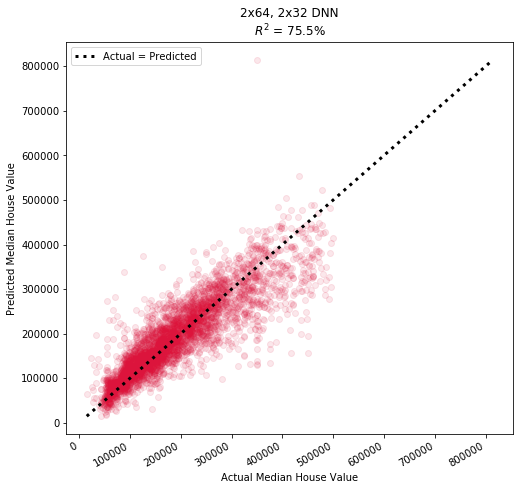

In [7]:
from sklearn.metrics import r2_score

fig = plt.figure(figsize=(8,8))

minv = min(y_test.min(), y_pred.min())
maxv = max(y_test.max(), y_pred.max())

plt.scatter(y_test, y_pred, alpha=0.1, c='crimson')
plt.plot([minv, maxv], [minv, maxv], c='k', linestyle=':', linewidth=3, label='Actual = Predicted')

plt.title('2x64, 2x32 DNN\n$R^2$ = {:.1f}%'.format(100*r2_score(y_test, y_pred)))
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')

plt.legend()

fig.autofmt_xdate()
plt.show()

In [9]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=20,
                   verbose=0,
                   mode='auto',
                   restore_best_weights=True)

model = Sequential()
model.add(Dense(24, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))

model.add(Dense(1))
# Compile model
model.compile(optimizer='Nadam', loss='mse',  metrics=['mape'])
# Fit the model
model.fit(X_train, y_train, epochs=2000, verbose=2, validation_split=0.2, batch_size=256, callbacks=[es])

y_pred = model.predict(X_test)



Train on 12574 samples, validate on 3144 samples
Epoch 1/2000
 - 1s - loss: 35810680258.4330 - mean_absolute_percentage_error: 83.0643 - val_loss: 10483887088.3664 - val_mean_absolute_percentage_error: 37.0949
Epoch 2/2000
 - 0s - loss: 8466808694.2071 - mean_absolute_percentage_error: 37.5434 - val_loss: 5421689637.1298 - val_mean_absolute_percentage_error: 33.6988
Epoch 3/2000
 - 0s - loss: 5890520399.1983 - mean_absolute_percentage_error: 32.8265 - val_loss: 5119015259.1959 - val_mean_absolute_percentage_error: 36.8923
Epoch 4/2000
 - 0s - loss: 4618041364.1559 - mean_absolute_percentage_error: 30.0707 - val_loss: 4061204203.8066 - val_mean_absolute_percentage_error: 28.7711
Epoch 5/2000
 - 0s - loss: 4054857138.2675 - mean_absolute_percentage_error: 28.0647 - val_loss: 3762398738.8906 - val_mean_absolute_percentage_error: 26.0602
Epoch 6/2000
 - 0s - loss: 3732498294.6957 - mean_absolute_percentage_error: 26.9494 - val_loss: 3844397237.7405 - val_mean_absolute_percentage_error: 31.

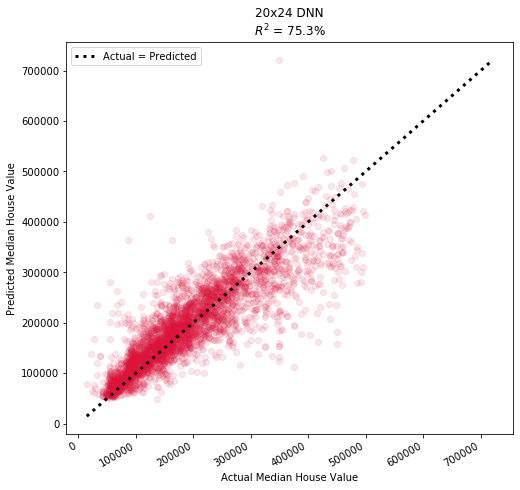

In [10]:
from sklearn.metrics import r2_score

fig = plt.figure(figsize=(8,8))

minv = min(y_test.min(), y_pred.min())
maxv = max(y_test.max(), y_pred.max())

plt.scatter(y_test, y_pred, alpha=0.1, c='crimson')
plt.plot([minv, maxv], [minv, maxv], c='k', linestyle=':', linewidth=3, label='Actual = Predicted')

plt.title('20x24 DNN\n$R^2$ = {:.1f}%'.format(100*r2_score(y_test, y_pred)))
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.legend()

fig.autofmt_xdate()
plt.show()